In [74]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_folder = r"C:\Users\Administrator\Desktop\CODA\CODA\base\images"
corner_case_json_path = r"C:\Users\Administrator\Desktop\CODA\CODA\base\corner_case.json"
save_folder_path = r"C:\Users\Administrator\Desktop\CODA\res"


with open(corner_case_json_path, 'r', encoding='utf8') as f:
    row_data = json.load(f)

categories = row_data["categories"]
images = row_data["images"]
annotations = row_data["annotations"]

len(images)

1000

先将前100张的gt_vis结果打到图片上

In [62]:
tmp = 1
for id in range(len(images)):
    if id == 0:
        continue
    img_id = tmp+id

    img_path = data_folder + '\\' + images[img_id-1]["file_name"]
    print(img_path)
    img = cv2.imread(img_path)

    for item in annotations:
        if item["image_id"] == img_id:
            box = item["bbox"]
            box_color = (255,0,255)   
            cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[0]+box[2]), int(box[1]+box[3])), color=box_color, thickness=2)

    sava_img = save_folder_path + '\\' + str(img_id) +"-" + images[img_id-1]["period"] + "-" + images[img_id-1]["weather"] + ".jpg"
    cv2.imwrite(sava_img, img)

C:\Users\Administrator\Desktop\CODA\CODA\base\images\000001_1616005254200.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000002_1616005443000.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000002_1616005519499.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000002_1616005520000.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000002_1616005520500.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000002_1616005678500.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000003_1616006878800.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000003_1616007142300.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000005_1616008462700.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000005_1616008464699.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000005_1616008469199.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000005_1616008599699.jpg
C:\Users\Administrator\Desktop\CODA\CODA\base\images\000005_1616

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


可以看到这个101是没有annotations的，很怪！(这块也可以用来查看图片中所有的annotations信息）

In [77]:
res_id = 101
for item in annotations:
        if item["image_id"] == res_id:
            print(item)

然后发现102上的annotation对应上了101

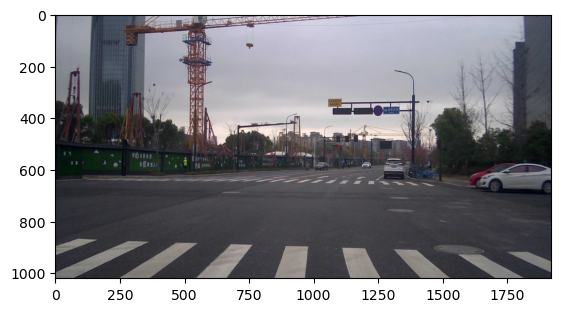

In [75]:
img = cv2.imread(r"C:\Users\Administrator\Desktop\CODA\res\101-day-cloudy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

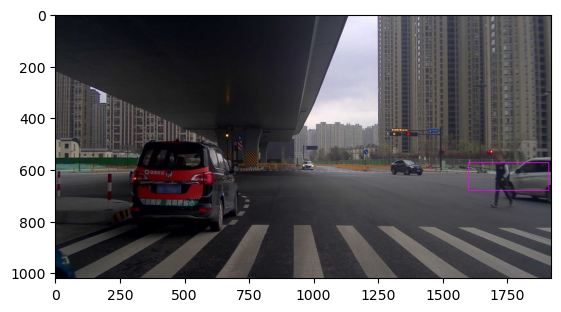

In [76]:
img = cv2.imread(r"C:\Users\Administrator\Desktop\CODA\res\102-day-cloudy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()